# Top 1000 YouTube Content Creators Analysis

## Overview
This analysis delves into the dataset of the top 1000 YouTube content creators, encompassing critical statistics such as rankings, categories, subscriber counts, country demographics, visit metrics, likes, comments, and more. The objective is to extract insights and trends from this rich dataset to better understand the landscape of influential YouTube personalities.

## Dataset Description
The dataset includes the following columns:
- **Ranking**: Position of the content creator in the top 1000.
- **Categories**: Genres or niches of content.
- **Subscribers**: Number of subscribers to the channel.
- **Country**: Origin country of the content creator.
- **Visits**: Visit metrics for the channel.
- **Likes**: Count of likes received.
- **Comments**: Number of comments on videos.


## Goals
- Analyze trends among top YouTube content creators.
- Identify popular categories or genres.
- Explore relationships between subscribers, likes, comments, and other metrics.
- Uncover insights into the geographical distribution of top creators.

## Analysis Steps
1. **Data Cleaning and Preparation**
   - Handling missing values, duplicates, and inconsistencies.
2. **Exploratory Data Analysis (EDA)**
   - Summary statistics, distributions, and visualizations.
3. **Feature Engineering**
   - Deriving new features for deeper insights.
4. **In-depth Analysis**
   - Exploring correlations, trends, and patterns.
5. **Conclusion and Insights**

## Tools and Libraries
- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Jupyter Notebooks for analysis and visualization.

## Importing Libraries

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
youtube = pd.read_csv("youtubers_df.csv")
youtube.head()


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


# Feature Engineering 

In [8]:
# Knowing more about the data set 
youtube.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [18]:
youtube.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

 ### Checking for missing data

In [19]:
youtube.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

### Handling missing values 

In [20]:
youtube['Categories'].fillna('Unknown', inplace=True)
youtube.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [21]:
youtube.sample(5)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
731,732,bibotoysrus,"Animación, Juguetes",13900000.0,Unknown,106400.0,0.0,0.0,http://youtube.com/channel/UCqk10y8p4_QVUT9e5L...
884,885,parislifestyle7488,Unknown,12600000.0,India,517100.0,5100.0,345.0,http://youtube.com/channel/UCt_KDu-DtBqvIw7X-V...
492,493,NMFNews,Noticias y Política,16800000.0,India,4000.0,86.0,2.0,http://youtube.com/channel/UCvxi7_X1VSaMr_osIa...
784,785,SonotekBhakti,Música y baile,13400000.0,India,4400.0,109.0,13.0,http://youtube.com/channel/UC3oQ1986eLZ4MhyPBi...
309,310,beckyg,Música y baile,21500000.0,Estados Unidos,0.0,0.0,0.0,http://youtube.com/channel/UCgtNC51EUSgcZ6kKyV...


## Trend Analysis

### Identify trends among the top YouTube streamers:
- Explore subscriber counts, engagement metrics, and geographical distribution.
  
### Most Popular Categories:
- Analyze the prevalence of categories among top streamers.
  
### Correlation between Subscribers and Engagement:
- Investigate the relationship between subscribers, likes, and comments.



In [23]:
## Exploring subscriber count

subscriber_stats = youtube['Subscribers'].describe()
subscriber_stats

count    1.000000e+03
mean     2.189440e+07
std      1.682775e+07
min      1.170000e+07
25%      1.380000e+07
50%      1.675000e+07
75%      2.370000e+07
max      2.495000e+08
Name: Subscribers, dtype: float64

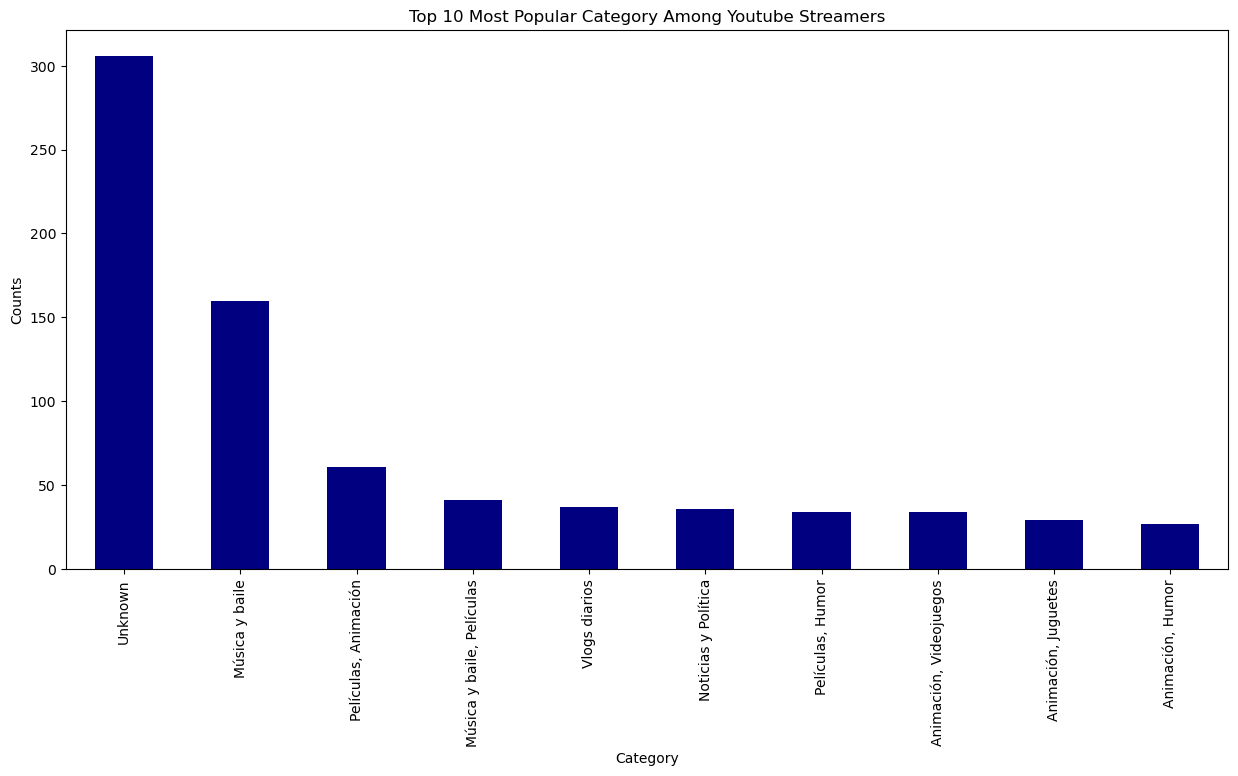

In [39]:
# Analyze Category Distribution
plt.figure(figsize=(15,7))
category_counts = youtube['Categories'].value_counts()
top_categories = category_counts.head(10)  # Consider top 10 categories
category_chart = top_categories.plot(kind='bar', color='navy')

plt.xlabel("Category")
plt.ylabel("Counts")
plt.title('Top 10 Most Popular Category Among Youtube Streamers')
plt.savefig('Top10Categories')
plt.show()

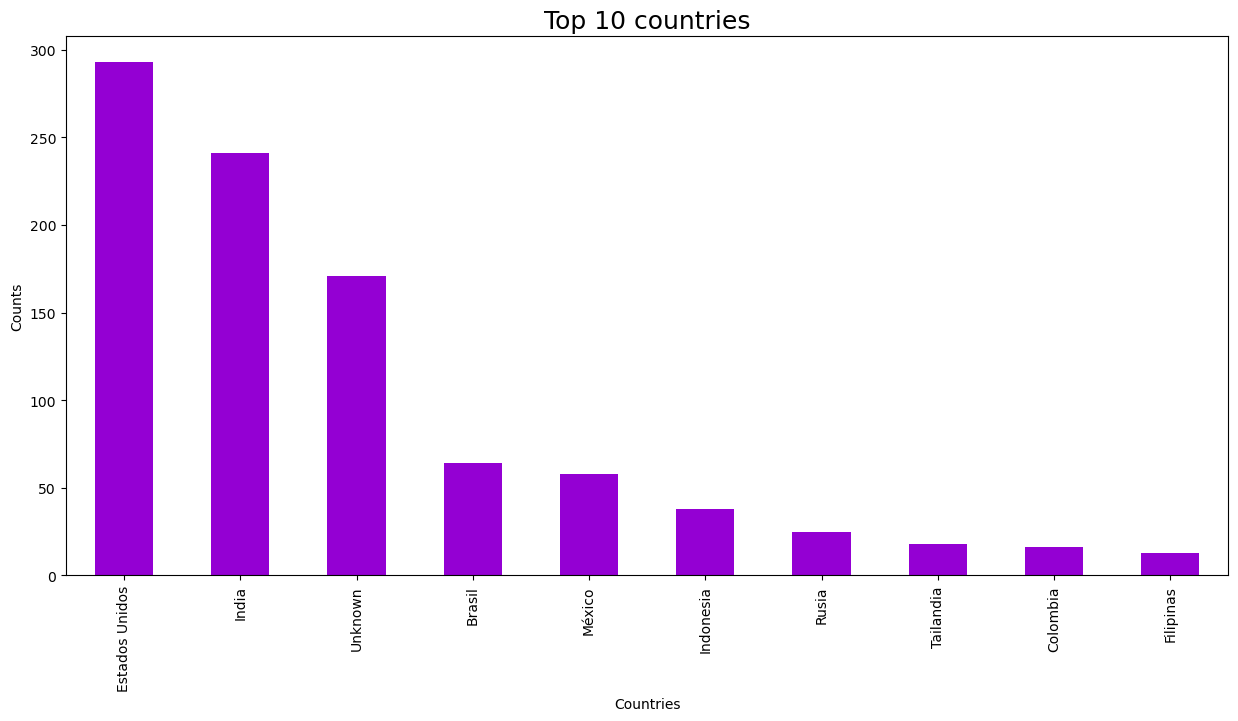

In [53]:
# Geographic Analysis 
plt.figure(figsize=(15,7))
topCountries = youtube['Country'].value_counts().head(10) # Top 10
topCountries.plot(kind='bar', color='darkviolet', width=0.5)
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.title("Top 10 countries", fontsize=18)
plt.savefig('TopCountries')
plt.show()

In [69]:
## Engagement metrics (Correlation)

correlation = youtube[['Subscribers', 'Likes', 'Comments' ]].corr()
correlation

,Subscribers,Likes,Comments
Subscribers,1.000000,0.211639,0.036350
Likes,0.211639,1.000000,0.325911
Comments,0.036350,0.325911,1.000000


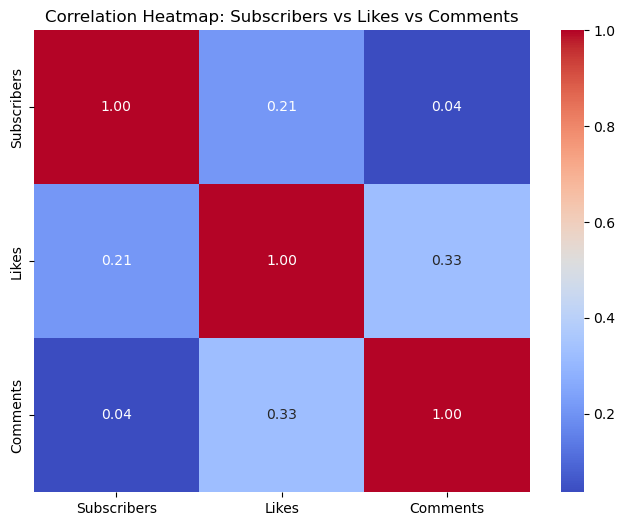

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation , annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Subscribers vs Likes vs Comments')
plt.savefig("Heatmap")
plt.show()